<a href="https://colab.research.google.com/github/pankaj-beldar/Capstone_project01_Airbnb_Booking_Analysis/blob/main/PRB_Indivisual_Nootbook_Airbnb_Booking_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

Let us start with first EDA Capstone Project- Exploratory Data Analysis of Airbnb Booking Dataset. By performing Data Analysis on Airbnb dataset, we are going to figure out following questions-
1. What is prefered location according to average best price?
2. Where are most of the hosts located?
3. The highest and lowest rent paying locations by customers 
4. Most Popular/demanded host based on reviews and calculated host listings count
5. Finding Relation between neighbourhood group and availability of rooms

In [1]:
# importing required python libraries
import numpy as np                              # for array mathematical operation
import matplotlib.pyplot as plt                 # to create 2D graphs and plots by using python scripts.
import pandas as pd                             # for data handling, wrangling
import seaborn as sns                           # making statistical graphics in Python

In [2]:
# data is available on google drive hence import drive 
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# from pandas read csv file
df= pd.read_csv('/content/Airbnb NYC 2019.csv')

In [5]:
# let us check first 5 instances of data
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
# let us check non null count, data type in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# let us check columns name in dataset
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

in above dataset following is the column distribution
1. id : a unique id identifying an airbnb lisitng
2. name : name representing the accommodation
3. host_id : a unique id identifying an airbnb host
4. host_name : name under whom host is registered
5. neighbourhood_group : a group of area
6. neighbourhood : area falls under neighbourhood_group
7. latitude : coordinate of listing
8. longitude : coordinate of listing
9. room_type : type to categorize listing rooms
10. price : price of listing
11. minimum_nights : the minimum nights required to stay in a single visit
12. number_of_reviews : total count of reviews given by visitors
13. last_review : date of last review given
14. reviews_per_month : rate of reviews given per month
15. calculated_host_listings_count : total no of listing registered under the host
16. availability_365 : the number of days for which a host is available in a year.

In [8]:
# let us check how many null values are present in each column
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
#The fillna() method replaces the NULL values with a specified value.
df.fillna(0, inplace=True)

In [10]:
# again check null values
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [11]:
#describe function is used to get a descriptive statistics summary of a given dataframe.
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


from above descriptive data we can see that minimum price is 0, which is not possible. also maximum value of minimum nights is 1250, which is also not possible. we need to set minimum price of 100$, and maximum of minimum nights cant be greater than 365 days

In [12]:
# A function for price_correction, where price=0, at that place, we need to put 100
def price_correction(x):
    if x==0:
        return 100
    else:
        return x

In [13]:
df[df['price']==0]
#Rows which have 'price'=0

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0,0.00,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [14]:
# replace all price=0 by price =100
df['price']=df['price'].apply(price_correction)

In [15]:
df['price'].isnull().sum()

0

In [16]:
# maximum stay cant be greater than 365 days hence use function to set maximum of minimum night to 365
def minimum_night_count(x):
 if x > 365:
    x==365
 else:
    x==x
    return x

In [17]:
df['minimum_nights']= df['minimum_nights'].apply(minimum_night_count)

In [18]:
# let us check min price and max of minimum night are revised or not using descriptive statistics.
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48881.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.743184,6.840429,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.144546,16.452017,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,58.500000,327.000000,365.000000


# 1.What is prefered location according to average best price?

In [20]:
avg_preffered_price_df = df.groupby(['neighbourhood_group','room_type'], as_index=False)['price'].mean()
avg_preffered_price_df

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.941718
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.338006
4,Brooklyn,Private room,76.559317
5,Brooklyn,Shared room,51.012107
6,Manhattan,Entire home/apt,249.246685
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [21]:
avg_preffered_price_df.columns= [x.replace('neighbourhood_group','location') for x in list(avg_preffered_price_df.columns)]

In [22]:
avg_preffered_price_df

,location,room_type,price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.941718
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.338006
4,Brooklyn,Private room,76.559317
5,Brooklyn,Shared room,51.012107
6,Manhattan,Entire home/apt,249.246685
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [23]:
avg_preffered_price_df.sort_values('price', ascending=False)[0:5]

,location,room_type,price
6,Manhattan,Entire home/apt,249.246685
3,Brooklyn,Entire home/apt,178.338006
12,Staten Island,Entire home/apt,173.846591
9,Queens,Entire home/apt,147.050573
0,Bronx,Entire home/apt,127.506596


Findings-
1. Top 5 locations based on average price are Manhatton, Brooklyn, Staten iasland, Queens, Bronx 

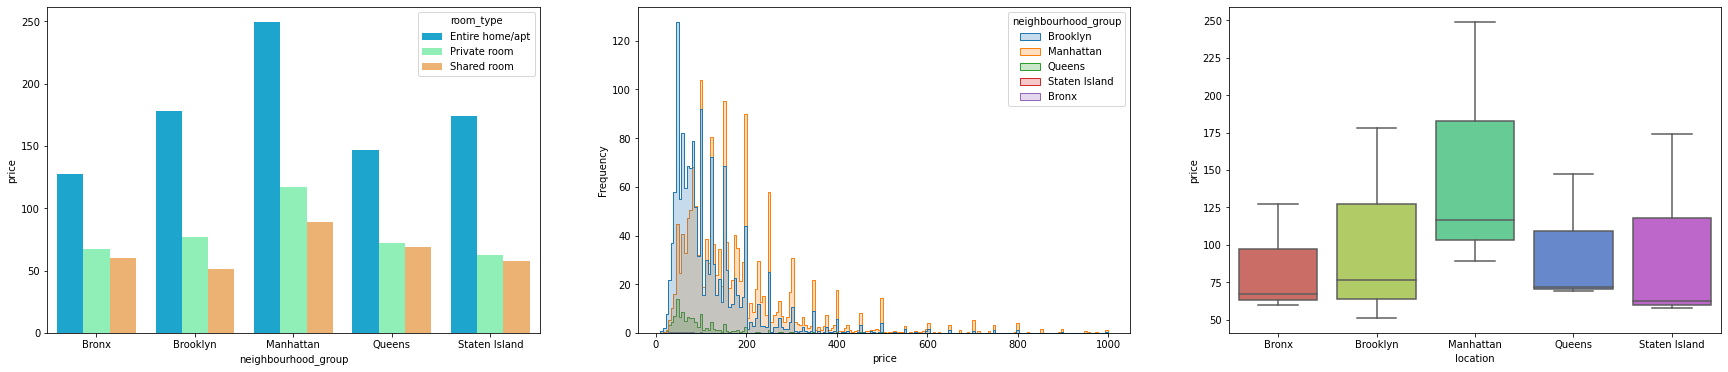

In [24]:
# let us plot the various graphs to find out relation between neighbourhood groups , room types and price
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
ax = axes.flatten()
mean_price_df = df.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['price']].mean()
sns.barplot(data=mean_price_df, x='neighbourhood_group', y ='price', hue='room_type', ax=ax[0], palette='rainbow')
sns.boxplot(x='location', y='price', data= avg_preffered_price_df, palette='hls')
sns.histplot(data=df[df['price'] < 1000], x="price", hue="neighbourhood_group", stat='frequency', element='step', ax=ax[1])

In [25]:
room_type_data=df['room_type'].value_counts()
room_type_data

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

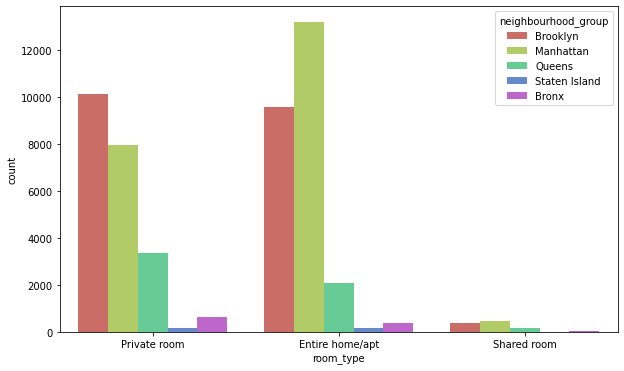

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['room_type'],hue=df['neighbourhood_group'], palette='hls')

Findings-
1. Location Manhattan (Neighbourhood Group) is more prefered in all types of rooms
2. Pricing of Manhattan group is high as compared to other groups
3. pricing and count of Entire home/ apartment is high as compared to shared room and private rooms in all locations
4. count of Private room is more in Brooklyn  than entire home or apartment

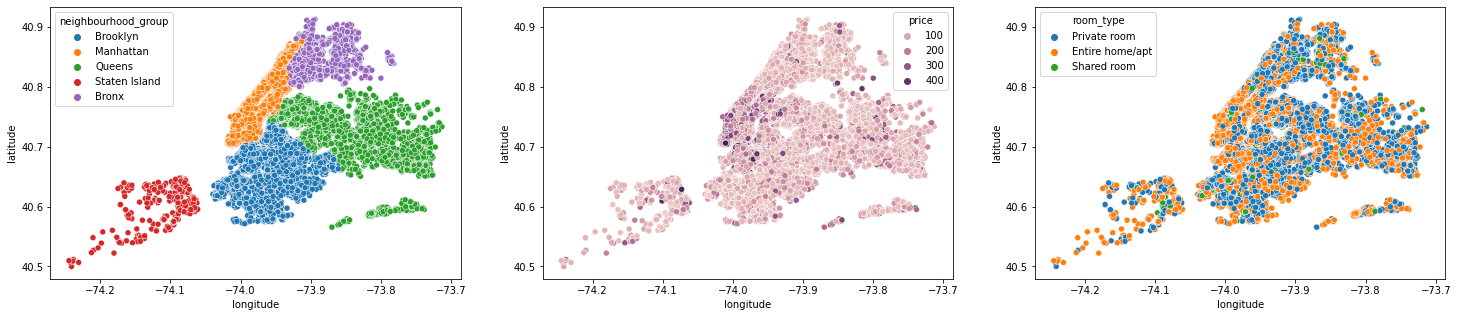

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
ax = axes.flatten()
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group' ,ax=ax[0])
sns.scatterplot(data=df[df['price']<500], x='longitude', y='latitude', hue='price', ax=ax[1])
sns.scatterplot(data=df, x='longitude', y='latitude', hue='room_type', ax=ax[2])

Findings-
1. Here we have plotted the scatter plot based on hue of location and price. we can clearly see that visitors prefers to visit the manhattan location as mostly the high price region is saturated near manhattan. 
2. In second plot, we have plotted the scatter plot over the price less than 500 $. we can clearly see that customers has high frequency to visit near manhattan region 
3. In third plot, we have plotted scatter plot over room type. we can see that shared rooms are least preferred by all customers in all nighbourhood groups. private rooms and entire home/apartments are highly prefered.